<a href="https://colab.research.google.com/github/YuliaVodopyanova/Topic_modeling/blob/main/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Новизна и актуальность проекта


**Актуальность проекта** - тематика психологического здоровья становится все более актуальной в современном обществе, особенно в условиях растущего стресса и тревожности. В связи с этим, люди все чаще обращаются к онлайн-платформам, таким как чаты и форумы в Telegram, для обсуждения своих проблем и получения поддержки. Анализ этих данных может предоставить ценные инсайты об основных проблемах, беспокоящих людей.

Тематическое моделирование (topic modelling) является одним из методов, позволяющих автоматически выделять основные темы из большого объема текстовых данных.

**Новизна проекта** - данные из чатов Telegram менее изучены по сравнению с данными из более популярных социальных сетей, таких как Twitter или Facebook. Это добавляет новизны. В то же время Telegram часто используется для более анонимных и откровенных обсуждений.

#Исторический обзор

**Вероятностный латентно-семантический анализ (PLSA)** предложен Томасом Хофманном в 1999 году.

Основные недостатки PLSA:

*   Число параметров растёт линейно по числу документов в коллекции, что может приводить к переобучению модели.

**Latent Dirichlet Allocation (LDA),** предложенный Блей и Джорданом в 2003 году, стал значительным прорывом в тематическом моделировании. LDA рассматривает документы как наборы тем, а темы — как распределения слов.

**Текущие подходы и SOTA**

 **Non-negative Matrix Factorization.** Еще один подход к тематическому моделированию, основанный на разложении матрицы частот слов на две ненулевые матрицы.

 Современные подходы включают использование нейросетей, таких как **BERT (Bidirectional Encoder Representations from Transformers)**. BERT и другие трансформерные модели могут создавать контекстно-зависимые эмбеддинги слов.

#Датасет

**Датасет** содержит сообщения из чата (https://t.me/psikhiatria), посвященного психологии в Telegram. Объем данных 531524 строки. Он состоит из следующих колонок:

**Message**: Сообщения, написанные пользователями.

**Network**: Указывает, что все данные взяты из Telegram.

**Year**: Год, когда сообщение было отправлено.

**Lemmas**: Лемматизированная версия сообщений, где слова приведены к их начальным формам для упрощения анализа.


# Парсер телеграмм-чата

In [ ]:
!pip install telethon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.3/606.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for telethon: filename=Telethon-1.36.0-py3-none-any.whl size=680878 sha256=47e8de77b3486bdfa71b3dbc9bdb71dbe84054a353af25eca96062ddc50881ff
  Stored in directory: /root/.cache/pip/wheels/4f/6f/86/da2c68242ca7dd92786186731ee763b7ecac8866666ac47170
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26347 sha256=84d8a86c995fc6cf7944b3ada49149fc09cd6cbafcb81872595dce76e03eb330
  Stored in directory: /root/.cache/pip/wheels/d6/84/5f/ea6aef85a93c7e1922486369874f4740a5642d261e09c59140
Successfully built telethon pyaes


In [ ]:
import csv
import spacy
from telethon.sync import TelegramClient

api_id = int()
api_hash = ''
chat_id = 'psikhiatria'

nlp = spacy.load("ru_core_news_sm")


def lemmatize_text(text):
    doc = nlp(text)
    result = " ".join([token.lemma_ for token in doc])
    return result


with TelegramClient('session_', api_id, api_hash, system_version="4.16.30-vxCUSTOM") as client:
    messages = client.iter_messages(chat_id)

    with open('telegram_chat.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Message', 'Network', 'Year', 'Lemmas'])

        for message in messages:
            if message.text:
                message_text = message.text
                network = 'telegram'
                message_date = message.date.year

                lemmatized_text = lemmatize_text(message_text)

                writer.writerow([message_text, network, message_date, lemmatized_text])

print('Data successfully saved in telegram_chat.csv')



---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [275]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/telegram_chat.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head(10)

,Message,Network,Year,Lemmas
0,всегда бы так,telegram,2024,всегда бы так
1,прилично 👍🏻,telegram,2024,прилично 👍 🏻
2,"вижу, 5,8",telegram,2024,"видеть , 5,8"
3,Это скольк в километраже получается?,telegram,2024,это скольк в километраже получаться ?
4,Мы пообнимались с кошкой 🥰❤️,telegram,2024,мы пообнимались с кошка 🥰 ❤ ️
5,Теперь у моего бибизяна музыка есть,telegram,2024,теперь у мой бибизяна музыка быть
6,😀,telegram,2024,😀
7,Немного настроение поднялось,telegram,2024,немного настроение подняться
8,Ходил по магазинам,telegram,2024,ходить по магазин
9,Сделал сегодня 8к шагов,telegram,2024,сделать сегодня 8к шаг


In [27]:
len(df)

531524

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531524 entries, 0 to 531523
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Message  531523 non-null  object
 1   Network  531524 non-null  object
 2   Year     531524 non-null  int64 
 3   Lemmas   531523 non-null  object
dtypes: int64(1), object(3)
memory usage: 16.2+ MB


# Проверка на наличие пустых значений:

In [ ]:
df.isna().sum()

Message    1
Network    0
Year       0
Lemmas     1
dtype: int64

В одной строке оказалось пропущенное значение в колонке лемматизированных текстов:

In [ ]:
df[df['Lemmas'].isna()]

,Message,Network,Year,Lemmas
401994,NaN,telegram,2023,NaN


Действительно так, удаляем

In [276]:
df = df[~df['Lemmas'].isna()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Небольшая аналитика по использованным эмодзи

In [ ]:
!pip install emoji==1.7

Создаем датафрейм с сообщениями, в которых есть эмодзи:

In [7]:
from emoji import is_emoji


df['has_emoji'] = df['Message'].apply(lambda text: any(is_emoji(char) for char in text))

df_with_emoji = df[df['has_emoji']]

In [4]:
df_with_emoji

,Message,Network,Year,Lemmas,has_emoji
1,прилично 👍🏻,telegram,2024,прилично 👍 🏻,True
4,Мы пообнимались с кошкой 🥰❤️,telegram,2024,мы пообнимались с кошка 🥰 ❤ ️,True
6,😀,telegram,2024,😀,True
19,🫐🫐🫐,telegram,2024,🫐🫐🫐,True
20,🫐🫐🫐,telegram,2024,🫐🫐🫐,True
...,...,...,...,...,...
531466,[🎲 Игровой Telegram-бот](https://t.me/CubeDice...,telegram,2023,[ 🎲 игровой telegram - бот](https://t.me / cub...,True
531478,[🔍 Поиск музыки](https://t.me/mixvk_bot),telegram,2023,[ 🔍 поиск музыки](https://t.me / mixvk_bot ),True
531485,"А я вчера ещё межовцхи хрярнула, потом в баре ...",telegram,2023,"а я вчера ещё межовцхи хрярнула , потом в бар ...",True
531499,"У меня профессор спрашивал на консилиуме, чем ...",telegram,2023,"у меня профессор спрашивать на консилиум , чем...",True


Удаляем из него дубликаты, которые являются рекламными:

In [11]:
unique_values = set()

for row in df_with_emoji.itertuples():
    i = row.Index  # Получаем индекс строки
    text = row.Message

    if len(text.split()) > 10 and text not in unique_values:
        df_with_emoji.loc[i, 'Message'] = text
        unique_values.add(text)
    elif len(text.split()) > 10 and text in unique_values:
        df_with_emoji.loc[i, 'Message'] = None

In [17]:
df_with_emoji[df_with_emoji['Message'].isna()]

,Message,Network,Year,Lemmas,has_emoji
3291,None,telegram,2024,"первый раз мучиться вопрос \n второй раз , да ...",True
98282,None,telegram,2023,[ @astonmartinmuzik](tg://user?id=6907750476 )...,True
110387,None,telegram,2023,"привет , котик 😊 \n адрес наш встреча поменять...",True
138214,None,telegram,2023,присоединяться к уютный сообщество пословица и...,True
156694,None,telegram,2023,"испугаться . они сказать лечить быть как бар ,...",True
156700,None,telegram,2023,"я тоже там лежать , но после того , как мне ск...",True
166441,None,telegram,2023,[ @nika_bond](tg://user?id=1151660515 ) [ ` 11...,True
184868,None,telegram,2023,меня тогда в психушка положить якобы по собств...,True
315331,None,telegram,2023,здравствовать \n если здесь быть кто - то из м...,True
364833,None,telegram,2023,[ 🎧 нажми чтобы найти песню](https://t.me / bu...,True


In [18]:
df_with_emoji = df_with_emoji[~df_with_emoji['Message'].isna()]

Смотрим, какие эмодзи есть в датафрейме:

In [19]:
unique_emojis = set()
for text in df_with_emoji['Message']:
  for char in text:
    if is_emoji(char):
      unique_emojis.add(char)

print('Unique emojis:')
print(unique_emojis)
print('Number of unique emojis:', len(unique_emojis))

Unique emojis:
{'😩', '💋', '🖖', '🌯', '😍', '😓', '🍭', '🐿', '🍾', '❗', '🙀', '🖍', '🥛', '🔩', '🥸', '🤑', '☂', '💪', '♟', '🪱', '✍', '👁', '\U0001faa9', '📖', '📺', '🌀', '😵', '💫', '\U0001faf3', '☠', '👩', '😠', '🥫', '🌚', '🦷', '🔥', '💅', '⚓', '😢', '🌊', '🙏', '❣', '📡', '🌺', '👒', '🚬', '👹', '🍫', '👴', '📅', '🐟', '😃', '⁉', '😤', '😻', '🦼', '🦌', '🚩', '🔹', '🌮', '🤧', '👝', '🙅', '👾', '🥱', '❌', '🤠', '🐣', '📲', '🚫', '🐬', '🥀', '👙', '✊', '🐻', '🤒', '🐙', '🥔', '📍', '🎮', '🦂', '🦕', '\U0001fae7', '💍', '🗿', '☹', '🎻', '🏼', '💃', '😈', '🪰', '🏸', '😔', '🙈', '🤮', '😷', '🍸', '🐐', '🗯', '🪀', '🏓', '🏴', '🦾', '⚡', '🌅', '🎯', '😫', '⬇', '🕘', '🏗', '🚽', '😯', '🪧', '🧘', '👏', '🚸', '🧸', '\U0001fae5', '🚣', '🛩', '🤪', '\U0001f9cc', '🙊', '💤', '💑', '📻', '👱', '♦', '🕶', '🏳', '🍃', '😴', '🅱', '🥣', '👚', '💁', '🤜', '🎂', '😑', '👤', '🍚', '😄', '🍗', '💡', '🎉', '🦣', '🚹', '⚰', '💵', '🙋', '🩹', '🥐', '🤡', '🔍', '🎁', '🍣', '🐤', '🕕', '🤖', '👅', '🚻', '👍', '👆', '🐚', '▫', '🚨', '🙍', '💝', '🎧', '😐', '🩴', '👈', '🖼', '🫐', '🪦', '🐓', '🩱', '🕓', '🃏', '🤱', '😿', '🐀', '\U0001faf5', '📝', '\U0001fae

In [20]:
from emoji import demojize, UNICODE_EMOJI
from itertools import chain

emojis = {
    'sad': [':crying_face:', ':sad_but_relieved_face:', ':disappointed_face:', ':loudly_crying_face:',
            ':thumbs_down:', ':face_without_mouth:', ':broken_heart:', ':face_with_thermometer:',
            ':face_with_head-bandage:', ':sneezing_face:', ':wilted_flower:', ':pleading_face:',
            ':neutral_face:', ':expressionless_face:', ':unamused_face:', ':downcast_face_with_sweat:',
            '	:pensive_face:', ':confused_face:', ':confounded_face:', ':worried_face:', ':persevering_face:',
            ':weary_face:', ':sleepy_face:', ':tired_face:', ':anxious_face_with_sweat:',
            ':crying_cat:', ':slightly_frowning_face:', ':hot_face:', ':pensive_face:'],

    'happy': [':grinning_face_with_big_eyes:', ':smiling_face_with_smiling_eyes:', ':laughing_face:',
              ':face_with_tears_of_joy:', ':grinning_face_with_sweat:', ':beaming_face_with_smiling_eyes:',
              ':smiling_face_with_heart-eyes:', ':smiling_face_with_hearts:', ':thumbs_up:',
              ':smiling_face_with_smiling_eyes:', ':partying_face:', ':rolling_on_the_floor_laughing:',
              ':sun_with_face:', ':party_popper:', ':confetti_ball:', ':couple_with_heart:',
              ':grinning_face:', ':grinning_face_with_big_eyes:', ':grinning_squinting_face:',
              ':drooling_face:', ':smiling_face_with_open_hands:', ':star-struck:', ':zany_face:',
              ':grinning_face_with_smiling_eyes:', ':smiling_face_with_halo:', ':winking_face:',
              ':face_savoring_food:', ':relieved_face:', ':smiling_face_with_sunglasses:',
              ':smirking_face:', ':slightly_smiling_face:', ':cat_with_wry_smile:',
              ':grinning_cat_with_smiling_eyes:', ':cat_with_tears_of_joy:', ':smiling_cat_with_heart-eyes:',
              ':kissing_cat:', ':kissing_face_with_closed_eyes:', ':cowboy_hat_face:',
              ':kissing_face:', ':face_blowing_a_kiss:', ':kissing_face_with_smiling_eyes:',
              ':kissing_face_with_smiling_eyes:', ':stuck_out_tongue_face:', ':winking_face_with_tongue:',
              ':squinting_face_with_tongue:', ':face_with_tongue:', ':nerd_face:', ':money-mouth_face:',
              ':grinning_cat:'],

    'angry': [':face_with_symbols_on_mouth:', ':pouting_cat:', ':face_with_steam_from_nose:',
              ':angry_face:', ':enraged_face:', ':angry_face_with_horns:', ':goblin:',
              ':ogre:'],

    'shocked': [':frowning_face_with_open_mouth:', ':anguished_face:', ':fearful_face:',
                ':face_with_open_mouth:', ':hushed_face:', ':face_screaming_in_fear:',
                ':astonished_face:', ':flushed_face:', ':face_with_crossed-out_eyes:',
                ':exploding_head:']
    }


sad_count = 0
happy_count = 0
angry_count = 0
shocked_count = 0
neutral_count = 0

sad_list = set()
happy_list = set()
angry_list = set()
shocked_list = set()
neutral_list = set()


for message in df_with_emoji['Message']:
    for char in message:
        if char in UNICODE_EMOJI['en']:
            # print('hey')
            emoji_text = demojize(char)
            # print(emoji_text)
            if emoji_text in emojis['sad']:
                sad_list.add(char)
                sad_count += 1
            elif emoji_text in emojis['happy']:
                happy_list.add(char)
                happy_count += 1
            elif emoji_text in emojis['angry']:
                angry_list.add(char)
                angry_count += 1
            elif emoji_text in emojis['shocked']:
                shocked_list.add(char)
                shocked_count += 1
            else:
              neutral_list.add(char)
              neutral_count += 1

emodjis_df = pd.DataFrame([['Sad emojis', sad_count, sad_list], ['Happy emojis', happy_count, happy_list],
 ['Angry emojis', angry_count, angry_list], ['Shocked emojis', shocked_count, shocked_list],
  ['Neutral or unidentified emojis', neutral_count, neutral_list]])

emodjis_df.columns = ['Category', 'Count', 'Emojis']

emodjis_df

,Category,Count,Emojis
0,Sad emojis,3209,"{😩, 🥵, 😿, 💔, 😔, 😓, 😑, 😰, 😣, 🤕, 🤧, 😫, 😟, 😥, 😭, ..."
1,Happy emojis,19619,"{🤓, 😛, 😂, 😹, 😜, 😃, 😍, 😀, 😻, 😸, 😙, 😄, 🤗, 😉, 😅, ..."
2,Angry emojis,150,"{👺, 🤬, 👿, 😤, 👹, 😠, 😾}"
3,Shocked emojis,1020,"{😱, 😦, 😲, 😵, 😮, 🤯, 😨, 😯, 😧, 😳}"
4,Neutral or unidentified emojis,12760,"{💋, 🖖, 🌯, 🍭, 🐿, 🍾, ❗, 🙀, 🖍, 🥛, 🔩, 🥸, ☂, 💪, ♟, ..."


Таким образом, веселые эмодзи в сообщениях чата встречаются чаще.

In [22]:
df = df.drop('has_emoji', axis=1)

#Предобработка текстов

In [277]:
!pip install emoji

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [278]:
!pip install stop_words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [279]:
from stop_words import get_stop_words
import string
import nltk
# from nltk.corpus import stopwords
import re
from emoji import demojize
import re

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [280]:
nltk.download('punkt')
nltk.download('wordnet')
stop_words_ru = get_stop_words('russian')

def preprocess_text(text):

  text = demojize(text)

  # text = re.sub(r':[^:\s]+:', '', text)

  text = re.sub(r'[^а-яёА-ЯЁ\s]', '', text)

  # text = re.sub(r'[^\w\s\-_]', '', text) 🥸, -

  # if isinstance(text, str):

    # text = re.sub(r'\d+', '', text)

    # text = re.sub(r'[a-zA-Z]', '', text)

  tokens = nltk.word_tokenize(text)

  lemmatizer = nltk.WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]

  tokens = [token for token in tokens if token not in stop_words_ru and
            len(token) > 2 and token not in ('поэтому', 'либо', 'типо', 'хз', 'свой', 'блин',
                                                                                      'наверное', 'щас', 'никто', 'ничто', 'вроде', 'вообще',
                                                                                      'например', 'хуйня', 'пиздец', 'хуй', 'бля', 'хуйня')]

  if len(tokens) >= 10:

    return ' '.join(tokens)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [281]:
df['preprocessed_text'] = df['Lemmas'].apply(preprocess_text)

df = df.drop('Lemmas', axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
df

,Message,Network,Year,preprocessed_text
0,всегда бы так,telegram,2024,None
1,прилично 👍🏻,telegram,2024,None
2,"вижу, 5,8",telegram,2024,None
3,Это скольк в километраже получается?,telegram,2024,None
4,Мы пообнимались с кошкой 🥰❤️,telegram,2024,None
...,...,...,...,...
531519,Короче. Нам дало таблицу и там было «признание...,telegram,2023,короче дать таблица признание общество семья д...
531520,нормально,telegram,2023,None
531521,2.3к,telegram,2023,None
531522,Диагноз можно пересмотреть через 5 лет.\nТам р...,telegram,2023,диагноз пересмотреть разный больные буйный спо...


После такой предобработки в текстах останутся пустые строки в новой колонке, которые надо удалить:

In [282]:
df = df[~df['preprocessed_text'].isna()]
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Message,Network,Year,preprocessed_text
33,"Короч, всё нарезала, а потом обнаружила, что б...",telegram,2024,короч нарезать обнаружить бульон странный мама...
41,Сейчас в основном придерживаются дофаминовой г...,telegram,2024,основный придерживаться дофаминовый гипотеза и...
56,Интересует вопрос. Почему внутренний секретарь...,telegram,2024,интересовать вопрос внутренний секретарь выход...
58,"Вот такой смартфон для восстановления купил ,V...",telegram,2024,смартфон восстановление купить тысяча тенге ру...
100,Народ у меня такой вопрос по флуоксетину (пью ...,telegram,2024,народ вопрос флуоксетину пить оригинал сильный...
...,...,...,...,...
531502,Начали братья прорубать в пуще просеки да греб...,telegram,2023,начать брат прорубать пуще просек гребли мости...
531508,Нам показывали фильм про эриматж и там были ка...,telegram,2023,показывать фильм эриматж картина скульптура ит...
531512,"слышал где-то, что электричество убирает тебя ...",telegram,2023,слышать электричество убирать цикл перерождени...
531519,Короче. Нам дало таблицу и там было «признание...,telegram,2023,короче дать таблица признание общество семья д...


## Проверка на наличие дубликатов:

In [283]:
df = df.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
df

,Message,Network,Year,preprocessed_text
33,"Короч, всё нарезала, а потом обнаружила, что б...",telegram,2024,короч нарезать обнаружить бульон странный мама...
41,Сейчас в основном придерживаются дофаминовой г...,telegram,2024,основный придерживаться дофаминовый гипотеза и...
56,Интересует вопрос. Почему внутренний секретарь...,telegram,2024,интересовать вопрос внутренний секретарь выход...
58,"Вот такой смартфон для восстановления купил ,V...",telegram,2024,смартфон восстановление купить тысяча тенге ру...
100,Народ у меня такой вопрос по флуоксетину (пью ...,telegram,2024,народ вопрос флуоксетину пить оригинал мг мг с...
...,...,...,...,...
531502,Начали братья прорубать в пуще просеки да греб...,telegram,2023,начать брат прорубать пуще просек гребли мости...
531508,Нам показывали фильм про эриматж и там были ка...,telegram,2023,показывать фильм эриматж картина скульптура ит...
531512,"слышал где-то, что электричество убирает тебя ...",telegram,2023,слышать электричество убирать цикл перерождени...
531519,Короче. Нам дало таблицу и там было «признание...,telegram,2023,короче дать таблица признание общество семья д...


#Векторизация текстов

**CountVectorizer**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv_vectorizer = CountVectorizer(
    max_df=0.85, min_df=2, max_features=1500
    )
cv_vectorized = cv_vectorizer.fit_transform(df.preprocessed_text)

**TfidfVectorizer**

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.75, min_df=4,
    max_features=1500
)
tfidf_matrix = tfidf_vectorizer.fit_transform(df.preprocessed_text)



---



# LatentDirichletAllocation + CountVectorizer

In [129]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import RandomizedSearchCV

In [58]:
search_params = {
    'n_components': [3, 5, 7, 10, 15],
    'max_iter': [3, 5, 10]
                 }

lda = LatentDirichletAllocation(
    learning_method='online',
    learning_offset=50
)

cv_model = RandomizedSearchCV(lda, search_params, verbose=True)
cv_model.fit(cv_vectorized)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=LatentDirichletAllocation(learning_method='online',
                                                       learning_offset=50),
                   param_distributions={'max_iter': [3, 5, 10],
                                        'n_components': [3, 5, 7, 10, 15]},
                   verbose=True)

In [59]:
best_lda = cv_model.best_estimator_

print('Best Model\'s Params:', cv_model.best_params_)
print('Best Log Likelihood Score:', cv_model.best_score_)
print('Model Perplexity: ', best_lda.perplexity(cv_vectorized))

Best Model's Params: {'n_components': 3, 'max_iter': 5}
Best Log Likelihood Score: -328051.5912946656
Model Perplexity:  1083.9558649633439


## Модель LatentDirichletAllocation

In [60]:
lda = LatentDirichletAllocation(
    n_components = 3,
    max_iter=5,
    learning_method='online',
    learning_offset=50
).fit(cv_vectorized)

In [11]:
def get_topics(components, vocab, top_words=7):
  topic_word_list = []

  for i, comp in enumerate(components):
    terms_comp = zip(vocab, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:top_words]
    topic_word_list.append([i[0] for i in sorted_terms])
  return topic_word_list

In [61]:
vocab = cv_vectorizer.get_feature_names_out()
topic_kw = get_topics(lda.components_, vocab, 10)

Визуализация:

In [12]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title, size1, size2):
    fig, axes = plt.subplots(size1, size2, figsize=(25, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

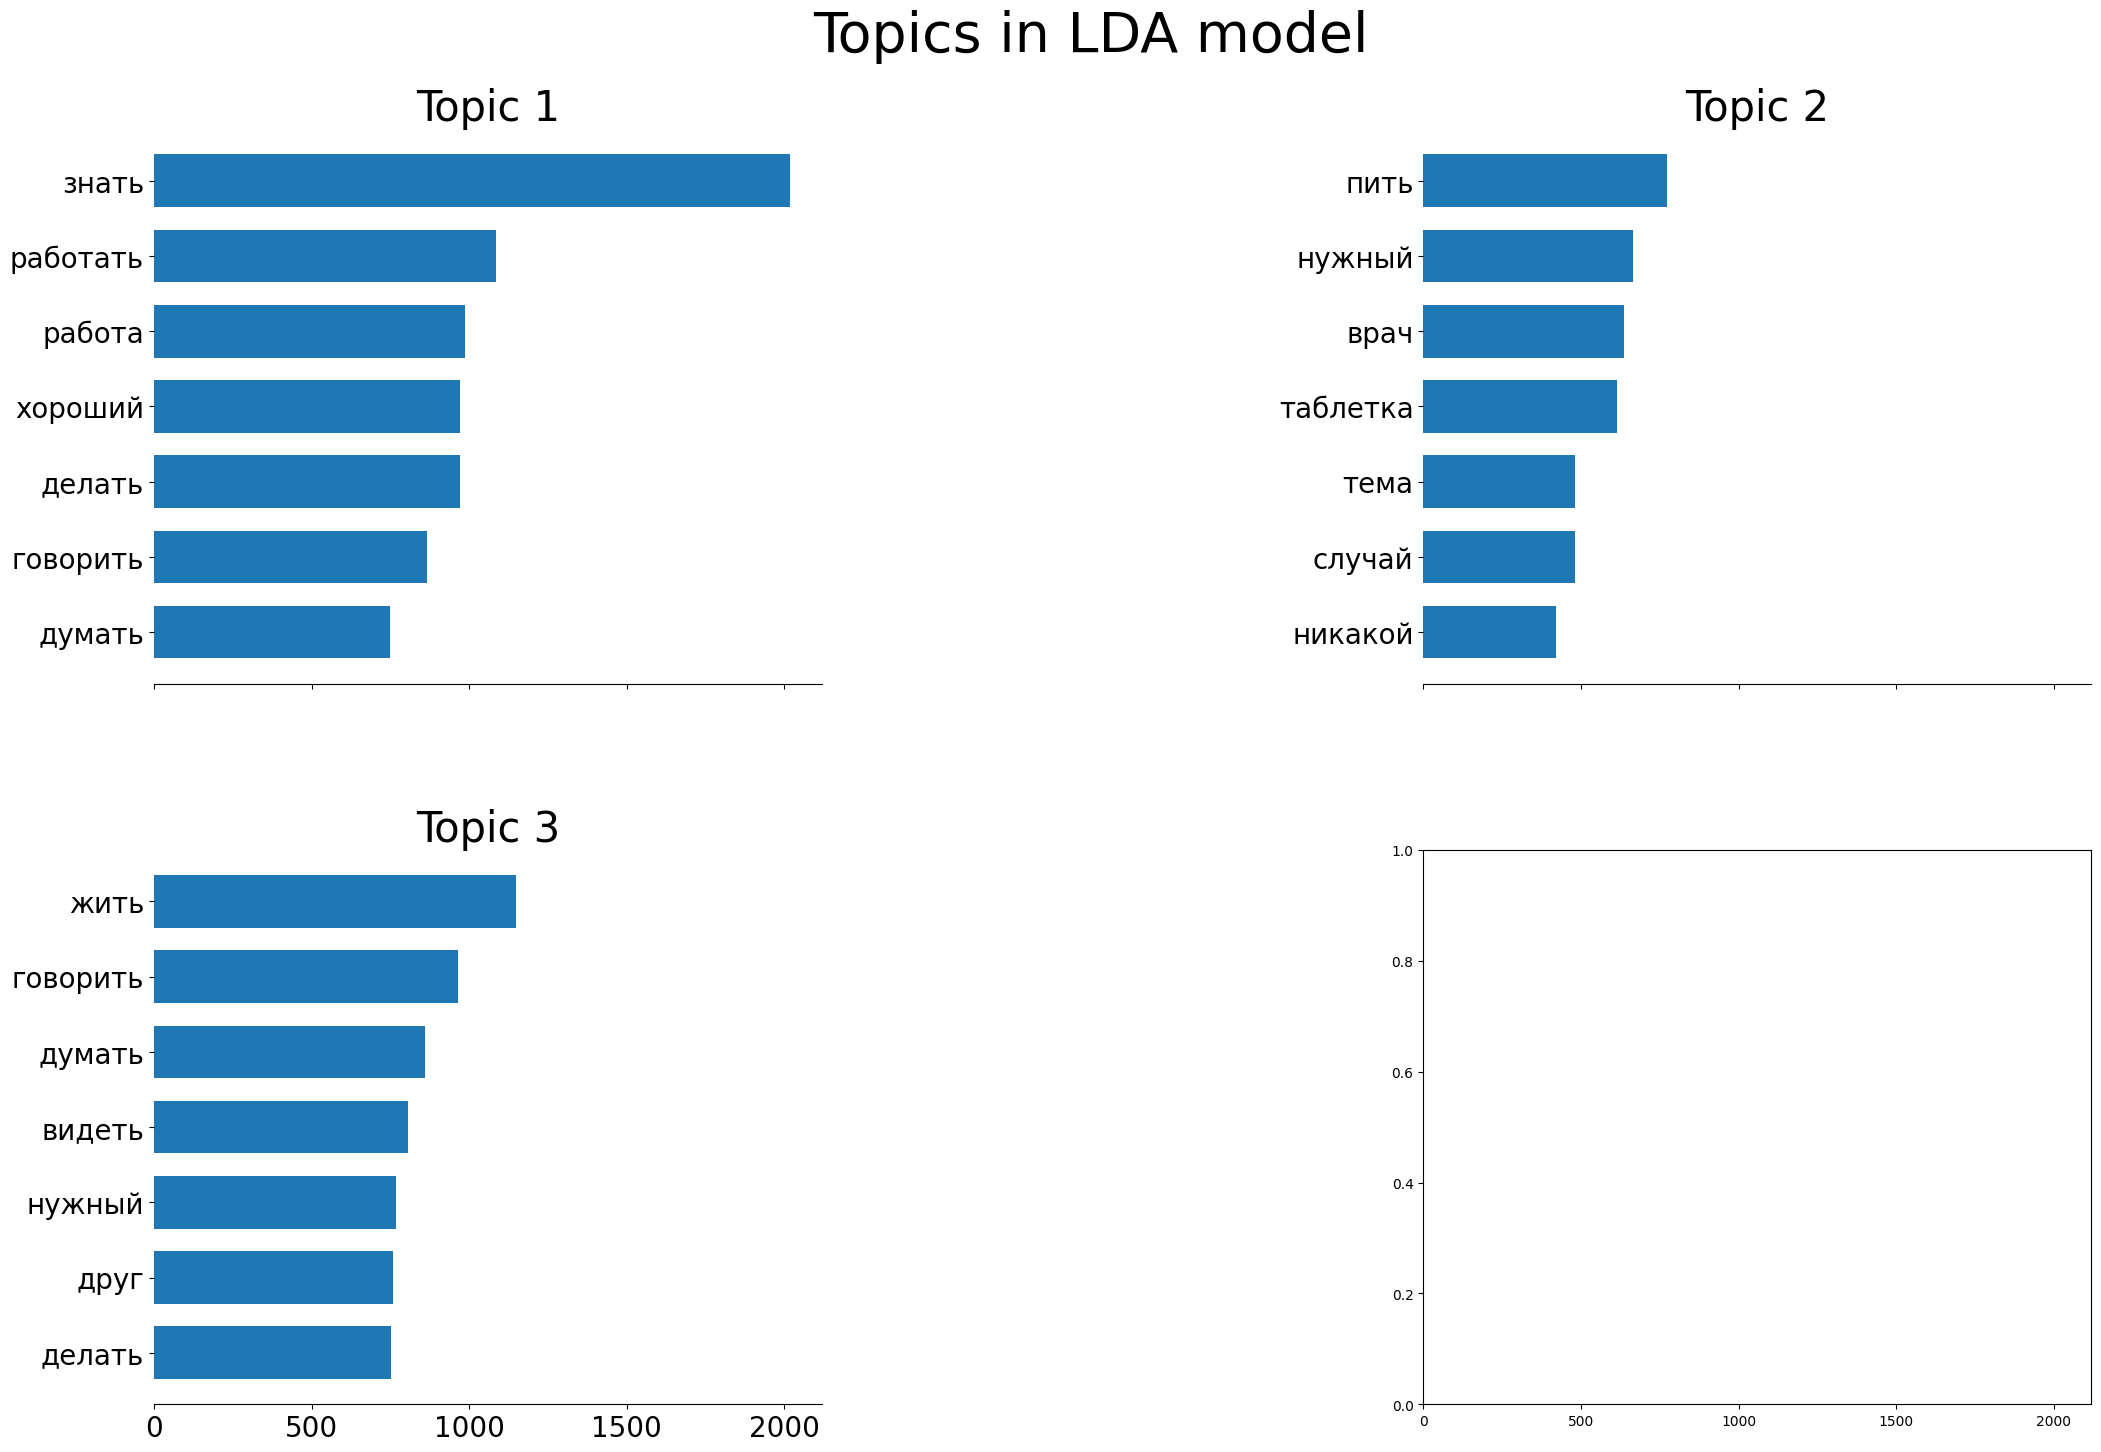

In [62]:
plot_top_words(lda, vocab, 7, "Topics in LDA model", 2, 2)

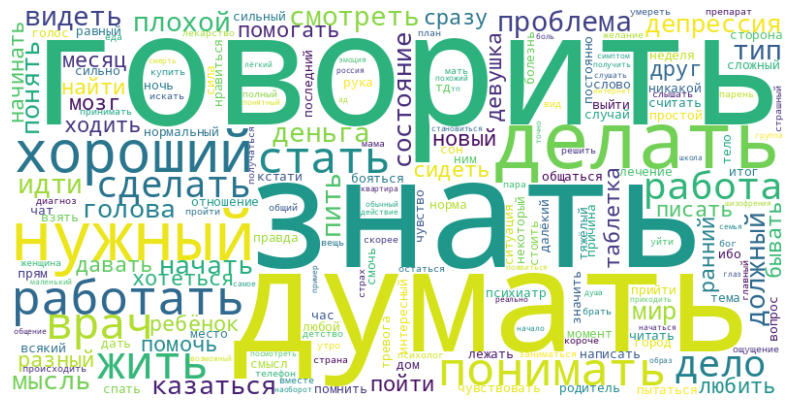

In [63]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['preprocessed_text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



---



## Убираем глаголы

Чтобы рационально подойти к решению проблемы, не убирая абсолютно все глаголы, сначала выведем их частотности и проанализируем их. Затем решим, какие из глаголов можно удалить из текстов.

In [13]:
!pip install pymorphy2

In [284]:
import pymorphy2
import collections

def count_verbs(texts):
  morph = pymorphy2.MorphAnalyzer()
  verbs = collections.Counter()
  for text in texts:
    words = text.split()
    for word in words:
      analysis = morph.parse(word)[0]
      if 'VERB' in analysis.tag or 'INFN' in analysis.tag:
        verbs[analysis.normal_form] += 1
  return verbs

verb_counts = count_verbs(df['preprocessed_text'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Py

In [285]:
verb_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Counter({'нарезать': 6,
         'обнаружить': 41,
         'спать': 589,
         'отвечать': 155,
         'придерживаться': 23,
         'интересовать': 44,
         'выходить': 266,
         'понимать': 1058,
         'начинаться': 154,
         'начинать': 522,
         'приходить': 293,
         'разложить': 8,
         'происходить': 327,
         'сдерживать': 14,
         'купить': 334,
         'заказать': 47,
         'присмотреть': 1,
         'пить': 1097,
         'ожидать': 38,
         'пробить': 11,
         'идти': 933,
         'стать': 1139,
         'нееееть': 2,
         'трахнуть': 9,
         'делать': 1742,
         'унаследовать': 3,
         'продвигаться': 7,
         'говорить': 2127,
         'вспоминать': 68,
         'расстрелять': 4,
         'взять': 407,
         'бороться': 73,
         'существовать': 233,
         'плакать': 103,
         'запостить': 1,
         'пасадить': 2,
         'насиловать': 12,
         'получить': 279,
         'бесить':

In [286]:
top_verbs = {}
for k, item in verb_counts.items():
  if item >= 500:
    top_verbs[k] = item

top_verbs = dict(sorted(top_verbs.items(), key=lambda item: -item[1]))
top_verbs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'говорить': 2127,
 'знать': 2033,
 'делать': 1742,
 'думать': 1618,
 'жить': 1264,
 'стать': 1139,
 'работать': 1106,
 'пить': 1097,
 'понимать': 1058,
 'идти': 933,
 'сделать': 899,
 'смотреть': 804,
 'начать': 794,
 'видеть': 793,
 'понять': 750,
 'найти': 693,
 'сидеть': 673,
 'писать': 665,
 'пойти': 661,
 'казаться': 634,
 'давать': 622,
 'ходить': 621,
 'любить': 610,
 'помочь': 596,
 'спать': 589,
 'бывать': 580,
 'дать': 552,
 'помогать': 538,
 'пытаться': 526,
 'хотеться': 526,
 'начинать': 522,
 'считать': 516}

In [287]:
del top_verbs['работать']
del top_verbs['любить']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [288]:
len(top_verbs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


30

Убираем отобранные глаголы из датафрейма:

In [289]:
def remove_words(text):
  for word in list(top_verbs.keys()):
    text = text.replace(f' {word} ', '').replace('  ', ' ')
  return text

df['no_verbs_text'] = df['preprocessed_text'].apply(remove_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-289-70aaa6f0ea7c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_verbs_text'] = df['preprocessed_text'].apply(remove_words)


In [290]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Message,Network,Year,preprocessed_text,no_verbs_text
33,"Короч, всё нарезала, а потом обнаружила, что б...",telegram,2024,короч нарезать обнаружить бульон странный мама...,короч нарезать обнаружить бульон странный мама...
41,Сейчас в основном придерживаются дофаминовой г...,telegram,2024,основный придерживаться дофаминовый гипотеза и...,основный придерживаться дофаминовый гипотеза и...
56,Интересует вопрос. Почему внутренний секретарь...,telegram,2024,интересовать вопрос внутренний секретарь выход...,интересовать вопрос внутренний секретарь выход...
58,"Вот такой смартфон для восстановления купил ,V...",telegram,2024,смартфон восстановление купить тысяча тенге ру...,смартфон восстановление купить тысяча тенге ру...
100,Народ у меня такой вопрос по флуоксетину (пью ...,telegram,2024,народ вопрос флуоксетину пить оригинал сильный...,народ вопрос флуоксетинуоригинал сильный вялос...
...,...,...,...,...,...
531502,Начали братья прорубать в пуще просеки да греб...,telegram,2023,начать брат прорубать пуще просек гребли мости...,начать брат прорубать пуще просек гребли мости...
531508,Нам показывали фильм про эриматж и там были ка...,telegram,2023,показывать фильм эриматж картина скульптура ит...,показывать фильм эриматж картина скульптура ит...
531512,"слышал где-то, что электричество убирает тебя ...",telegram,2023,слышать электричество убирать цикл перерождени...,слышать электричество убирать цикл перерождени...
531519,Короче. Нам дало таблицу и там было «признание...,telegram,2023,короче дать таблица признание общество семья д...,корочетаблица признание общество семья деньга ...


In [ ]:
# import pymorphy2

# morph = pymorphy2.MorphAnalyzer()

# def remove_verbs(words):
#   filtered_words = []
#   for word in words.split():
#     parse_result = morph.parse(word)[0]
#     if parse_result.tag.POS != 'VERB' and parse_result.tag.POS != 'INFN':
#       filtered_words.append(word)

#   return ' '.join(filtered_words)

In [ ]:
# df['no_verbs_text'] = df['preprocessed_text'].apply(remove_verbs)

<ipython-input-15-0dec8c4117d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_verbs_text'] = df['preprocessed_text'].apply(remove_verbs)




---



## LatentDirichletAllocation + CountVectorizer без глаголов

In [122]:
from sklearn.feature_extraction.text import CountVectorizer

cv_vectorizer = CountVectorizer(
    max_df=0.75, min_df=4, max_features=1000
    )
cv_vectorized_no_verbs = cv_vectorizer.fit_transform(df.no_verbs_text)

In [123]:
# from sklearn.decomposition import LatentDirichletAllocation

lda_no_verbs = LatentDirichletAllocation(
    n_components=4,
    max_iter=10,
    learning_method='online',
    learning_offset=50
).fit(cv_vectorized_no_verbs)

Оценка модели:

In [124]:
print("Log likelihood: ", lda_no_verbs.score(cv_vectorized_no_verbs))

print("Perplexity: ", lda_no_verbs.perplexity(cv_vectorized_no_verbs))

Log likelihood:  -1049784.6770793588
Perplexity:  897.9698830372373


In [125]:
vocab_no_verbs = cv_vectorizer.get_feature_names_out()
topic_kw_no_verbs = get_topics(lda_no_verbs.components_, vocab_no_verbs, 10)

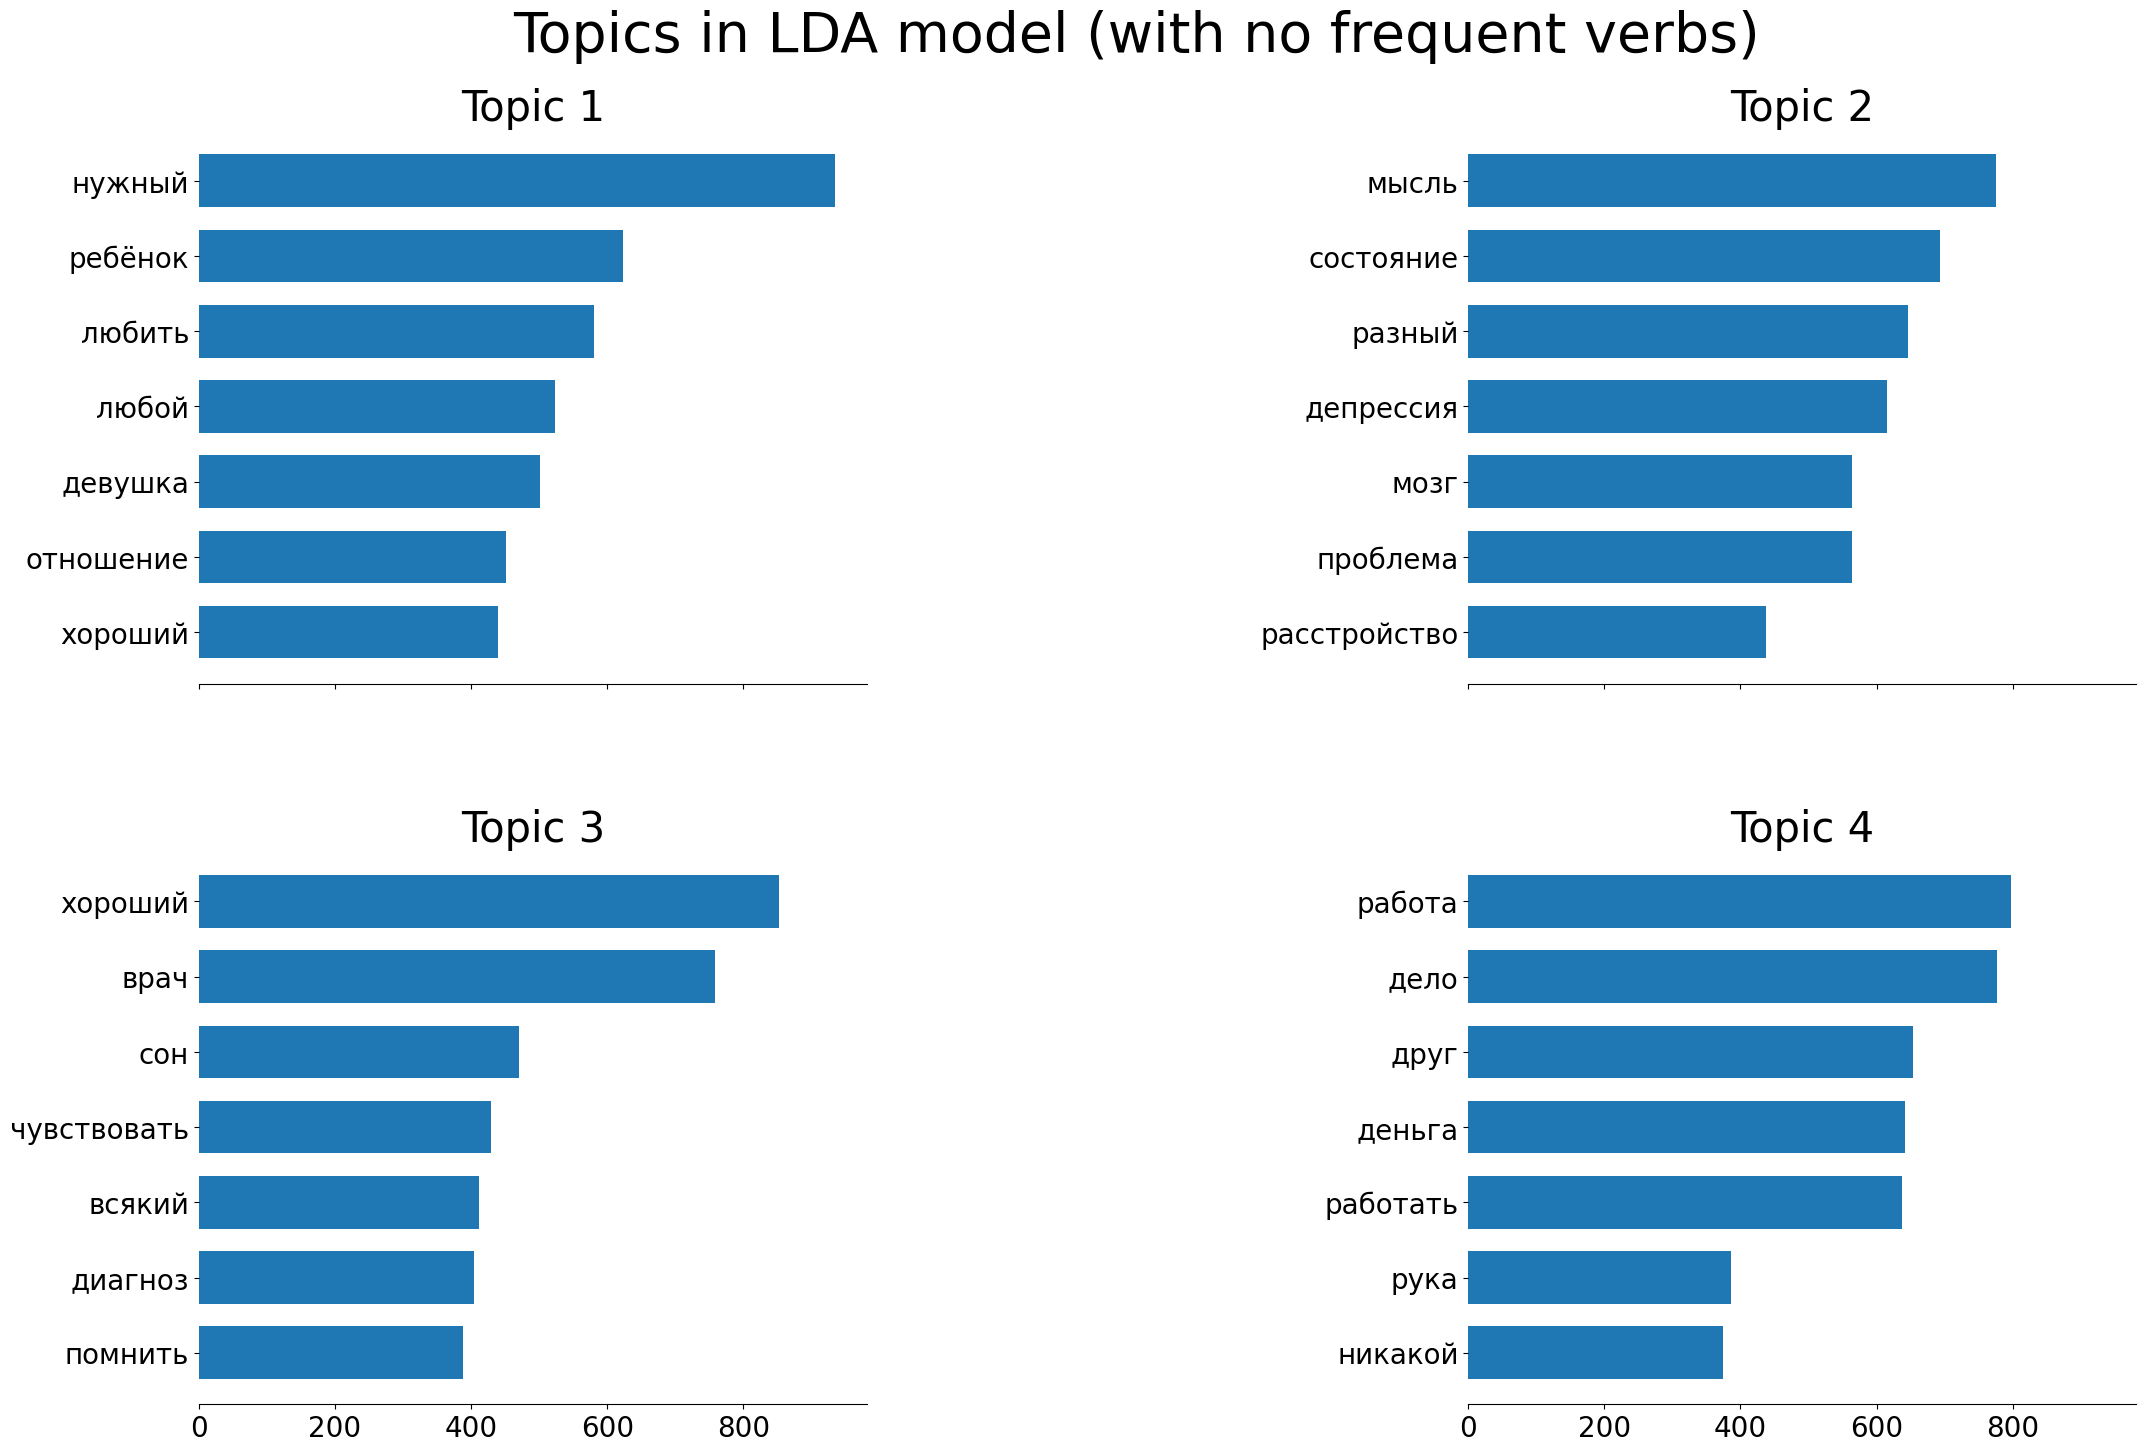

In [127]:
plot_top_words(lda_no_verbs, vocab_no_verbs, 7, "Topics in LDA model (with no frequent verbs)", 2, 2)

Topic 1 - отношения

Topic 2 - мысли и состояния

Topic 3 - лечение

Topic 4 - работа

# LatentDirichletAllocation + Tfidf

In [132]:
search_params = {
    'n_components': [3, 5, 7, 10, 15],
    'learning_offset': [10, 50, 80]
                 }

lda_m = LatentDirichletAllocation(
    learning_method='online',
    max_iter=10,
)

cv_model = RandomizedSearchCV(lda_m, search_params, verbose=True)
cv_model.fit(tfidf_matrix)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=LatentDirichletAllocation(learning_method='online'),
                   param_distributions={'learning_offset': [10, 50, 80],
                                        'n_components': [3, 5, 7, 10, 15]},
                   verbose=True)

In [133]:
best_lda = cv_model.best_estimator_

print('Best Model\'s Params:', cv_model.best_params_)
print('Best Log Likelihood Score:', cv_model.best_score_)
print('Model Perplexity: ', best_lda.perplexity(tfidf_matrix))

Best Model's Params: {'n_components': 3, 'learning_offset': 50}
Best Log Likelihood Score: -95898.43088331161
Model Perplexity:  1771.2884697794352


In [219]:
lda_tfidf = LatentDirichletAllocation(
    n_components=5,
    max_iter=10,
    learning_method='online',
    learning_offset=50
).fit(tfidf_matrix)

Оценка:

In [220]:
print("Log likelihood: ", lda_tfidf.score(tfidf_matrix))

print("Perplexity: ", lda_tfidf.perplexity(tfidf_matrix))

Log likelihood:  -470897.35452796327
Perplexity:  2468.7720920795055


In [221]:
vocab_tfidf = tfidf_vectorizer.get_feature_names_out()

topic_kw_tfidf = get_topics(lda_tfidf.components_, vocab_tfidf, 10)

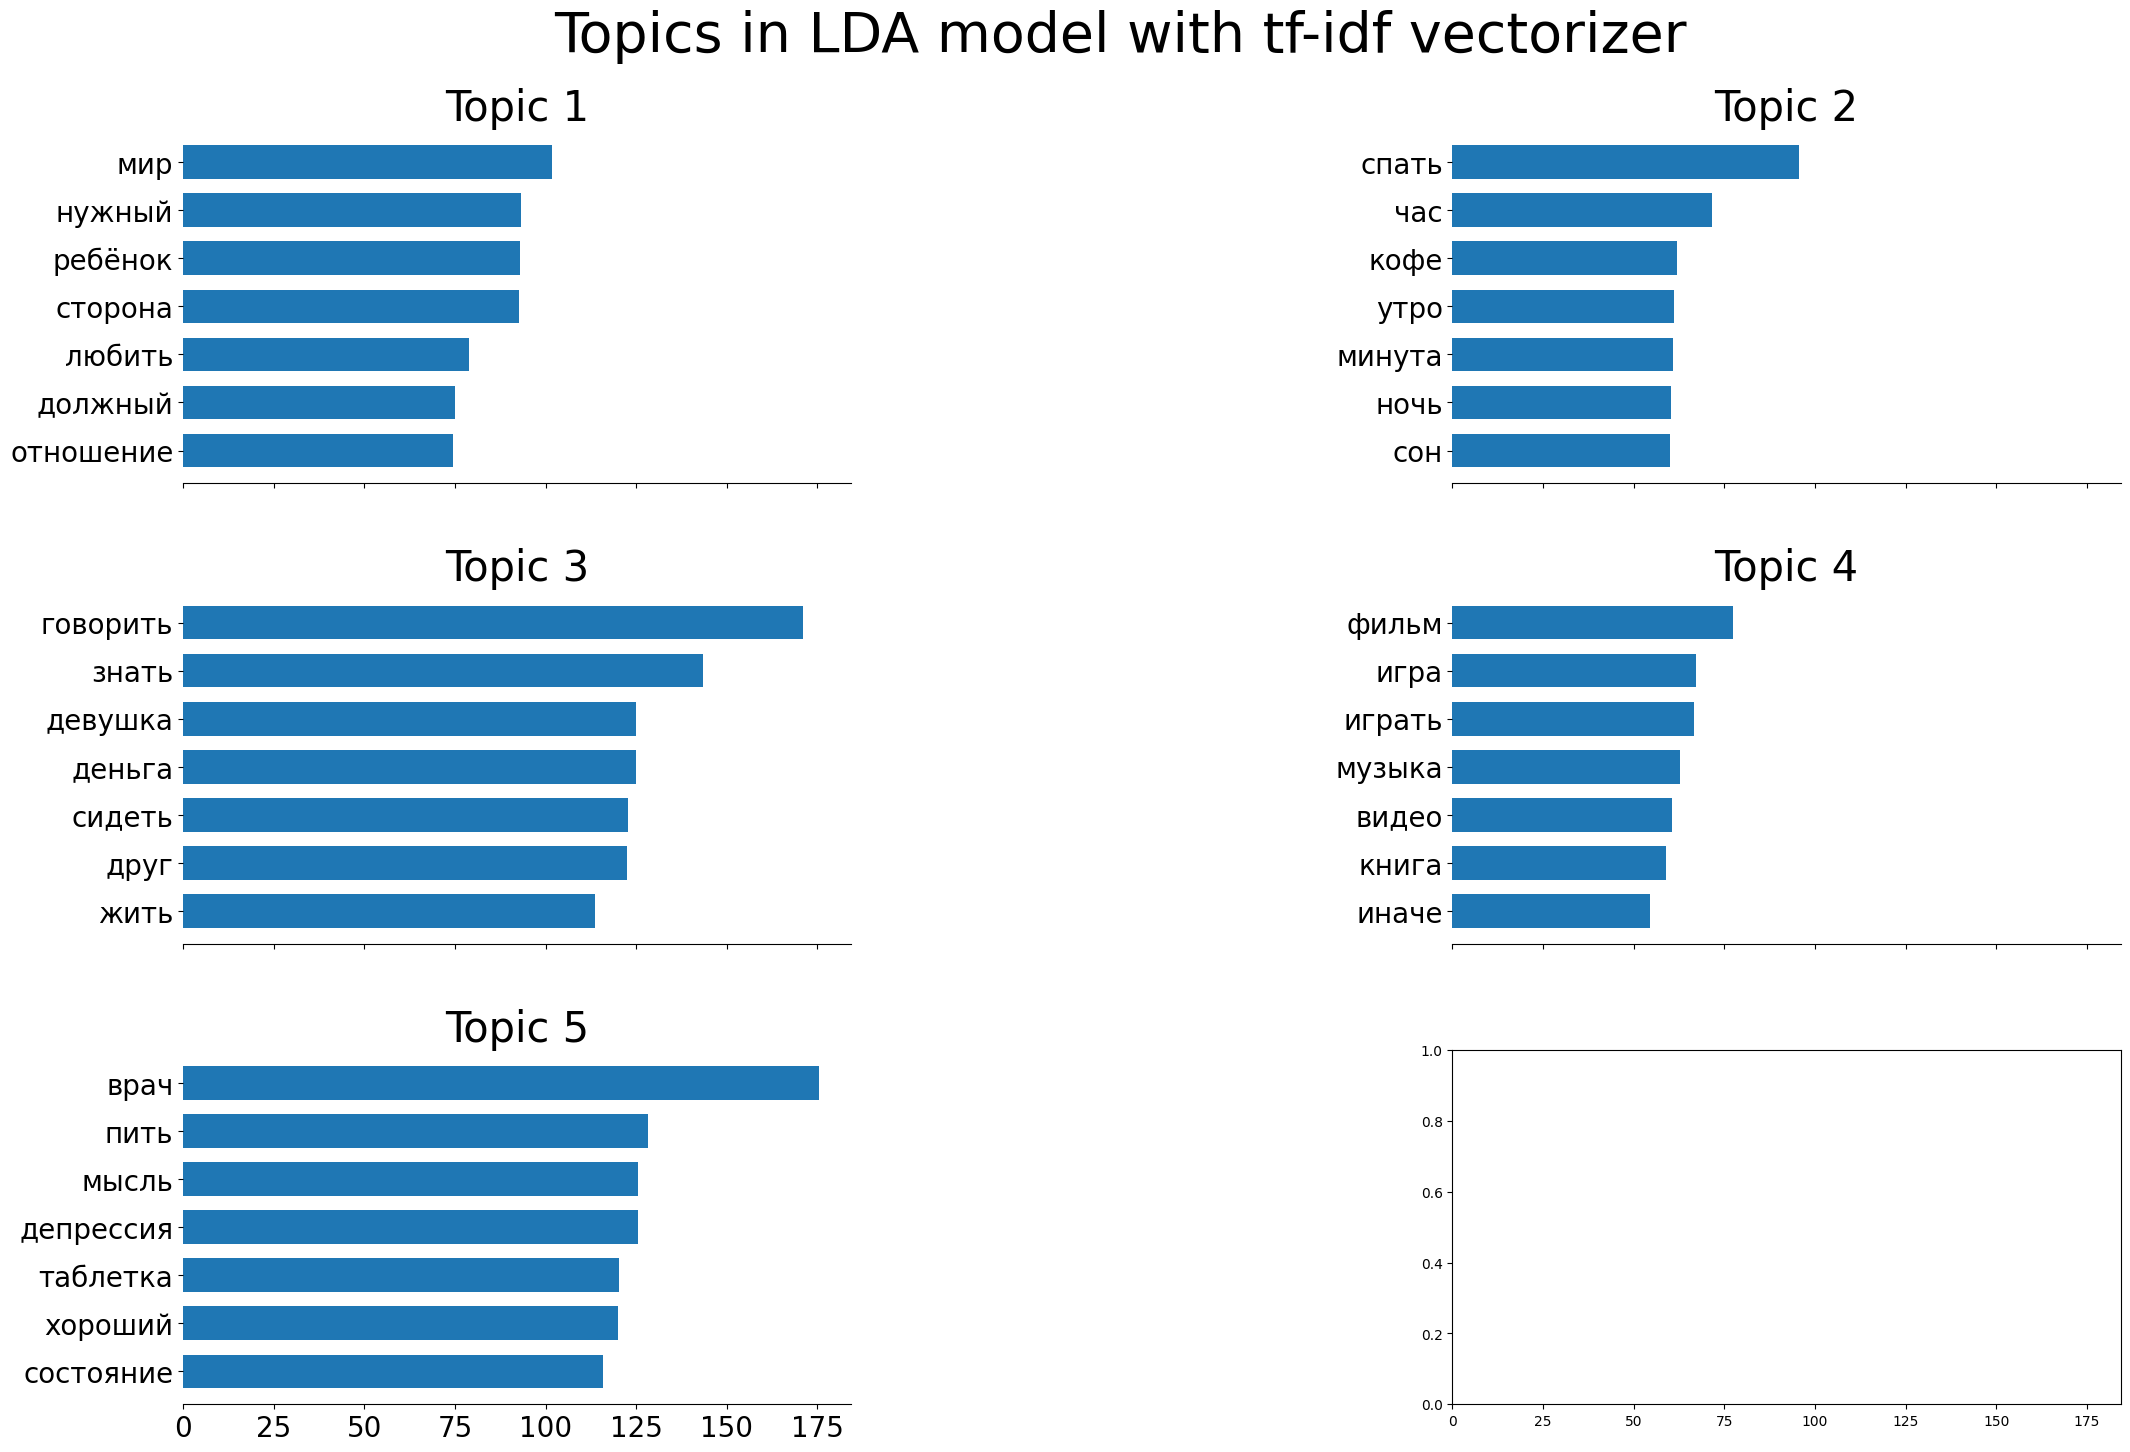

In [222]:
plot_top_words(lda_tfidf, vocab_tfidf, 7, "Topics in LDA model with tf-idf vectorizer", 3, 2)

Topic 1 - общество и семья

Topic 2 - сон

Topic 3 - отношения

Topic 4 - свободное время

Topic 5 - диагнозы и заболевания

# LatentDirichletAllocation c биграммами (без частотных глаголов)

In [223]:
def get_ngram(tokens=df['no_verbs_text'], n=2) -> set:
    new_tokens = []
    for i in range(len(tokens) - n):
        for num in range(n):
            new_tokens.append(tuple(tokens.split()[i:i+num+1]))
    return set(new_tokens)

In [224]:
df["tokens_and_bigrams"] = df['no_verbs_text'].apply(get_ngram)

<ipython-input-224-b0de54846b04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tokens_and_bigrams"] = df['no_verbs_text'].apply(get_ngram)


In [225]:
df["tokens_and_bigrams"]

33        {(странный, мамасестра), (принятие, решение), ...
41        {(избыток,), (путь, головной), (головной,), (о...
56        {(приходить,), (секретарь,), (вопрос, внутренн...
58        {(курс,), (тысяча,), (восстановление, купить),...
100       {(наоборот,), (усиление, вялость), (пробить, я...
                                ...                        
531502    {(замориться, ослабнуть), (замориться,), (оста...
531508    {(эриматж, картина), (мда, существовать), (кар...
531512    {(убирать, цикл), (перерождение, конец), (коне...
531519    {(успех,), (деньга,), (корочетаблица,), (класс...
531522    {(весёлыйбог,), (весёлый, наблюдать), (больные...
Name: tokens_and_bigrams, Length: 21126, dtype: object

In [226]:
def n(row):
  result = []
  row = list(row)
  for st in row:
    if len(st) == 2 and st[0].isalpha() and st[1].isalpha():
      result.append(st[0]+'_'+st[1])

  return ' '.join(result)

In [227]:
ngrams_all = df['tokens_and_bigrams'].apply(n)

In [228]:
len(ngrams_all)

21126

Векторизируем:

In [234]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_bi = TfidfVectorizer(
    max_df=0.7, min_df=5,
    max_features=1500
)
tfidf_matrix_bi = tfidf_vectorizer_bi.fit_transform(ngrams_all)

Создаем тематическую модель:

In [261]:
from sklearn.decomposition import LatentDirichletAllocation

lda_tfidf_bi = LatentDirichletAllocation(
    n_components=6,
    max_iter=5,
    learning_method='online',
).fit(tfidf_matrix_bi)

Оценка:

In [262]:
print("Log likelihood: ", lda_tfidf_bi.score(tfidf_matrix_bi))

print("Perplexity: ", lda_tfidf_bi.perplexity(tfidf_matrix_bi))

Log likelihood:  -62047.41913970554
Perplexity:  2539.250669767994


In [263]:
vocab_tfidf_bi = tfidf_vectorizer_bi.get_feature_names_out()

topic_kw_tfidf_bi = get_topics(lda_tfidf_bi.components_, vocab_tfidf_bi, 10)

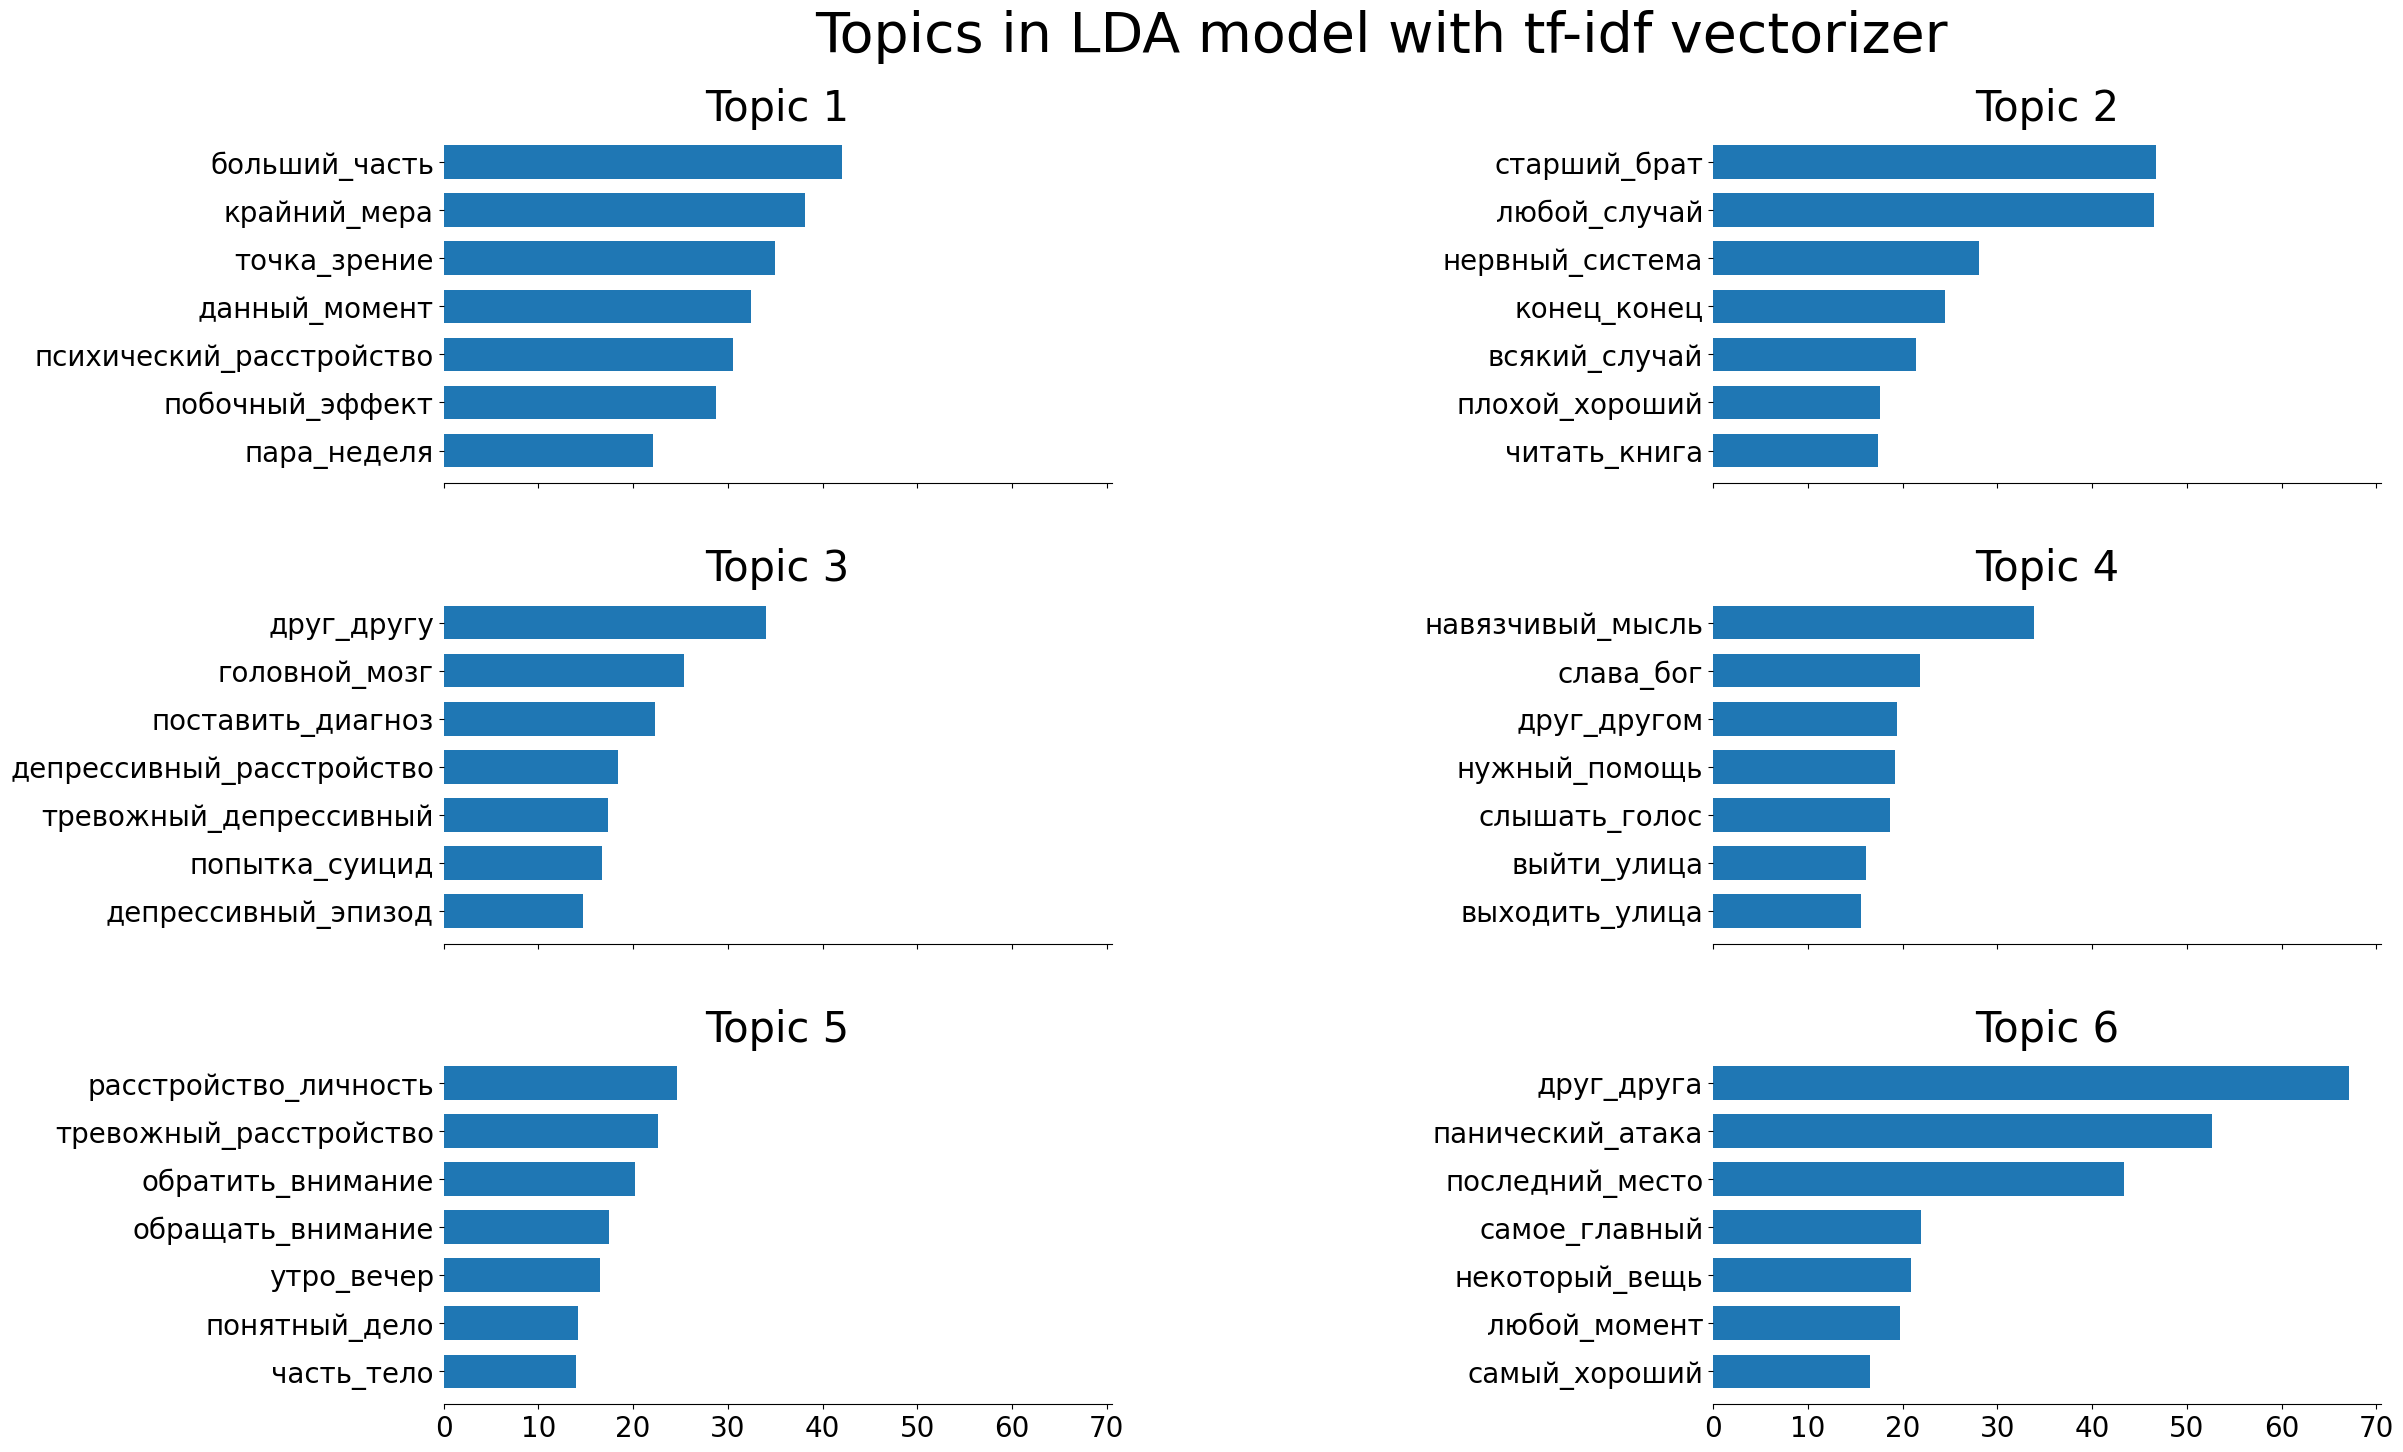

In [264]:
plot_top_words(lda_tfidf_bi, vocab_tfidf_bi, 7, "Topics in LDA model with tf-idf vectorizer", 3, 2)

Topic 1 - Психическое здоровье и лечение

Topic 2 - Жизненные ситуации и переживания

Topic 3 - Депрессия и суицидальные мысли

Topic 4 - Внутренние конфликты и поиск поддержки

Topic 5 - Психические расстройства и восприятие

Topic 6 - Социальная адаптация и внутренний мир

# LdaModel (без частотных глаголов)

In [ ]:
# df['no_verbs_text'] = df['no_verbs_text'].apply(lambda text: text.replace('-', '').replace('_', ''))

<ipython-input-21-fa4e7ebd928c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_verbs_text'] = df['no_verbs_text'].apply(lambda text: text.replace('-', '').replace('_', ''))


In [291]:
tokenized_text_no_verbs = df['no_verbs_text'].apply(lambda x: x.split())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [267]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.8 MB/s eta 0:00:00


In [268]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel

In [292]:
dictionary = Dictionary(tokenized_text_no_verbs)
corpus = [dictionary.doc2bow(text) for text in tokenized_text_no_verbs]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [297]:
num_topics_list = [5, 6, 10, 15]

for num_topics in num_topics_list:
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

    topics = model.show_topics(num_words=10)
    print(f"\n\nТоп-10 слов для {num_topics} тем:")
    print(topics)

    coherence_model = CoherenceModel(model=model, texts=tokenized_text_no_verbs, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print(f"\nCoherence score: {coherence_score}")

    perplexity = model.log_perplexity(corpus)
    print(f"\nPerplexity: {perplexity}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




Топ-10 слов для 5 тем:
[(0, '0.006*"хороший" + 0.005*"нужный" + 0.004*"работать" + 0.004*"ребёнок" + 0.003*"сон" + 0.003*"разный" + 0.003*"новый" + 0.003*"друг" + 0.003*"чат" + 0.003*"час"'), (1, '0.006*"мир" + 0.004*"хороший" + 0.003*"бог" + 0.003*"вопрос" + 0.003*"нужный" + 0.003*"свет" + 0.003*"врач" + 0.002*"место" + 0.002*"конец" + 0.002*"вода"'), (2, '0.005*"ребёнок" + 0.004*"должный" + 0.004*"любой" + 0.004*"проблема" + 0.003*"хороший" + 0.003*"любить" + 0.003*"дело" + 0.003*"мир" + 0.003*"война" + 0.003*"нужный"'), (3, '0.004*"девушка" + 0.004*"отношение" + 0.004*"нужный" + 0.004*"друг" + 0.003*"плохой" + 0.003*"хороший" + 0.003*"любить" + 0.003*"вещь" + 0.003*"тип" + 0.003*"проблема"'), (4, '0.005*"депрессия" + 0.004*"состояние" + 0.004*"деньга" + 0.004*"мысль" + 0.004*"тревога" + 0.004*"расстройство" + 0.003*"работа" + 0.003*"хороший" + 0.003*"тип" + 0.003*"голова"')]

Coherence score: 0.4282414474923888

Perplexity: -10.158131963603115


Топ-10 слов для 6 тем:
[(0, '0.010*

In [300]:
lda_model2 = LdaModel(corpus=corpus, num_topics=6, id2word=dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [301]:
for i in range(6):
    print(f"Тема {i}:")
    topics = lda_model2.show_topic(i, topn=10)
    for word, weight in topics:
        print(f"{word}: {weight:.3f}")
    print()

Тема 0:
мысль: 0.008
хороший: 0.007
голова: 0.005
бояться: 0.004
нужный: 0.004
сон: 0.004
сильный: 0.003
чат: 0.003
утро: 0.003
парень: 0.003

Тема 1:
ребёнок: 0.006
работа: 0.005
работать: 0.005
деньга: 0.005
хороший: 0.005
друг: 0.005
девушка: 0.004
любить: 0.004
плохой: 0.004
нужный: 0.004

Тема 2:
мир: 0.006
мозг: 0.005
состояние: 0.005
нужный: 0.004
хороший: 0.004
депрессия: 0.004
проблема: 0.003
работать: 0.003
эмоция: 0.003
должный: 0.003

Тема 3:
вид: 0.004
сон: 0.004
эффект: 0.003
врач: 0.003
терапия: 0.003
разный: 0.003
глаз: 0.003
симптом: 0.003
расстройство: 0.002
принимать: 0.002

Тема 4:
нужный: 0.004
любой: 0.003
парень: 0.003
дело: 0.003
случай: 0.003
препарат: 0.003
доза: 0.003
малый: 0.002
читать: 0.002
нейролептик: 0.002

Тема 5:
тип: 0.004
город: 0.004
врач: 0.004
дом: 0.003
нём: 0.003
психиатр: 0.003
пустой: 0.003
неделя: 0.003
приехать: 0.002
телефон: 0.002



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [302]:
vis = gensimvis.prepare(lda_model2, corpus, dictionary, mds='mmds')
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Topic 1 - Личные отношения и ценности (1)

Topic 2 - Психическое здоровье и самочувствие (2)

Topic 3 - Внутренний мир и страхи (0)

Topic 4 - Помощи и общество (5)

Topic 5 - Медикаменты (4)

Topic 6 - Симптомы и лечение (3)



---



# LDA model с биграммами

In [303]:
import json
import glob
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [304]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text)
        final.append(new)
    return (final)
data_words = gen_words(df['preprocessed_text'])

In [309]:
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=100)
bigram = gensim.models.phrases.Phraser(bigram_phrases)

def make_bigrams(texts):
  bigrams = [bigram[doc] for doc in texts]
  filtered_bigrams = [[token for token in doc if '_' in token] for doc in bigrams]
  filtered_bigrams = [doc for doc in filtered_bigrams if doc]

  return filtered_bigrams


data_bigrams = make_bigrams(data_words)

In [306]:
len(data_bigrams)

3910

In [307]:
from gensim.models import Phrases, CoherenceModel
from gensim.models.phrases import Phraser


def evaluate_coherence(texts, min_count, thresholds, dictionary, coherence='c_v'):
    coherence_values = []
    for threshold in thresholds:
        bigram_phrases = Phrases(texts, min_count=min_count, threshold=threshold)
        bigram = Phraser(bigram_phrases)
        data_bigrams = [bigram[doc] for doc in texts]
        lda_model = gensim.models.LdaModel([dictionary.doc2bow(text) for text in data_bigrams], num_topics=10, id2word=dictionary)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_bigrams, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherence_model_lda.get_coherence())

    return coherence_values

In [308]:
dictionary = gensim.corpora.Dictionary(data_words)
thresholds = [1, 10, 20, 50, 100]
min_count = 1
coherence_values = evaluate_coherence(data_words, min_count, thresholds, dictionary)

for threshold, coherence in zip(thresholds, coherence_values):
    print(f"Threshold: {threshold}, Coherence: {coherence}")

Threshold: 1, Coherence: 0.3446567131740802
Threshold: 10, Coherence: 0.4600695973610163
Threshold: 20, Coherence: 0.43748281772950043
Threshold: 50, Coherence: 0.45260009480324825
Threshold: 100, Coherence: 0.5009030668471023


In [310]:
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams)

texts = data_bigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids]

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [311]:
lda_model1 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [312]:
perplexity = lda_model1.log_perplexity(corpus)
print(f"Perplexity: {perplexity}")

Perplexity: -5.964133054290352


In [313]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model1, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.253659 -0.267770       1        1  28.970335
3     -0.037175  0.356251       2        1  20.784163
0     -0.184706 -0.318043       3        1  17.561541
2     -0.348614  0.079964       4        1  16.571500
4      0.316836  0.149598       5        1  16.112460, topic_info=                         Term        Freq       Total Category  logprob  \
13                 друг_друга  112.000000  112.000000  Default  30.0000   
15   психический_расстройство   78.000000   78.000000  Default  29.0000   
33           панический_атака   86.000000   86.000000  Default  28.0000   
45              больший_часть   68.000000   68.000000  Default  27.0000   
99      расстройство_личность   58.000000   58.000000  Default  26.0000   
..                        ...         ...         ...      ...      ...   
258            пачка_сигарета   10.069476   10.746756   Topic5  -4.2428   
268              холодный_душ    9.410012   10.087191   Topic5  -4.3106   
358      политик_знаменитость    9.354041   10.032185   Topic5  -4.3165   
98   обсессивно_компульсивный    8.838252    9.519038   Topic5  -4.3733   
272              глубина_душа    8.449575    9.126825   Topic5  -4.4182   

     loglift  
13   30.0000  
15   29.0000  
33   28.0000  
45   27.0000  
99   26.0000  
..       ...  
258   1.7605  
268   1.7561  
358   1.7556  
98    1.7514  
272   1.7485  

[180 rows x 6 columns], token_table=      Topic      Freq                         Term
term                                              
147       1  0.960832        алкоголь_токсикомания
40        3  0.972004                апатия_абулия
331       3  0.941920              бабушка_дедушка
337       4  0.903276                      бла_бла
45        5  0.997098                больший_часть
...     ...       ...                          ...
2         1  0.915272                 чувство_юмор
70        3  0.952328                  чёрный_дыра
296       3  0.908405  шизотипическое_расстройство
309       4  0.953509                ядерный_война
39        4  0.935666               ядерный_оружие

[150 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3, 5])

# Оценки

**LDA + CountVectorizer**

Log Likelihood: -328051.5912946656

Perplexity:  1083.9558649633439


---




**LDA + CountVectorizer (без глаголов)**

Log likelihood:  -1049784.6770793588


Perplexity:  897.9698830372373



---



**LDA + Tf-idf**

Log likelihood:  -470897.35452796327


Perplexity:  2468.7720920795055



---


**LDA + Tf-idf с биграммами**

Log likelihood:  -62047.41913970554

Perplexity:  2539.250669767994


---



**LDA gensim (без глаголов)**

Coherence score: 0.4354473186695374

Log-perplexity: -10.327607924050874



---



**LDA gensim с биграммами**

Coherence: 0.5009030668471023

Log-Perplexity: -5.964133054290352



---




* LDA + CountVectorizer:  Модель показывает средние показатели по log likelihood и хорошие по perplexity, что говорит о том, что, в целом, она подходит для данных

* LDA + CountVectorizer (без глаголов): Модель демонстрирует показатели по log likelihood значительно хуже модели с глаголами, perplexity также оказалось немного ниже.

* LDA + Tf-idf: Один из лучших результатов по log likelihood, но худший по perplexity.

* LDA + Tf-idf с биграммами: По сравнению с аналогичной моделью с униграммами, демонстрирует более высокий log likelihood, но и perplexity здесь возросла.

* LDA Gensim (без глаголов) и LDA Gensim с биграммами:  Модели показывают хорошие результаты по coherence score и log-perplexity, что свидетельствует об их более высоком относительно остальных моделей качестве.

**Вывод**

LDA Gensim (без глаголов) - одна из лучших  моделей по  показателям, а также по выделенным моделью темам и их ключевым словам.

# Добавление названий тем

In [314]:
topic_distribution = df['no_verbs_text'].apply(lambda x: lda_model2.get_document_topics(dictionary.doc2bow(x.split())))

In [315]:
topic_distribution_sorted = topic_distribution.apply(lambda x: sorted(x, key=lambda y: y[1], reverse=True))

In [316]:
topic_distribution_sorted

33        [(3, 0.35973155), (5, 0.2385528), (2, 0.211504...
41        [(2, 0.67736673), (3, 0.1374722), (5, 0.135747...
56        [(2, 0.7189276), (4, 0.13893622), (5, 0.111383...
58        [(1, 0.5872915), (5, 0.3591716), (0, 0.0134156...
100       [(0, 0.4585358), (1, 0.27432165), (2, 0.128872...
                                ...                        
531502    [(1, 0.67256), (4, 0.28597382), (0, 0.01042936...
531508    [(3, 0.41409427), (4, 0.26016507), (1, 0.20779...
531512    [(2, 0.5629241), (4, 0.35377374), (5, 0.028630...
531519    [(1, 0.42127648), (2, 0.29024366), (4, 0.12999...
531522    [(3, 0.45075557), (5, 0.35174572), (0, 0.14928...
Name: no_verbs_text, Length: 21126, dtype: object

In [317]:
df['dominant_topic'] = topic_distribution_sorted.apply(lambda x: x[0][0])

<ipython-input-317-7409b3ec475e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dominant_topic'] = topic_distribution_sorted.apply(lambda x: x[0][0])


In [318]:
df

,Message,Network,Year,preprocessed_text,no_verbs_text,dominant_topic
33,"Короч, всё нарезала, а потом обнаружила, что б...",telegram,2024,короч нарезать обнаружить бульон странный мама...,короч нарезать обнаружить бульон странный мама...,3
41,Сейчас в основном придерживаются дофаминовой г...,telegram,2024,основный придерживаться дофаминовый гипотеза и...,основный придерживаться дофаминовый гипотеза и...,2
56,Интересует вопрос. Почему внутренний секретарь...,telegram,2024,интересовать вопрос внутренний секретарь выход...,интересовать вопрос внутренний секретарь выход...,2
58,"Вот такой смартфон для восстановления купил ,V...",telegram,2024,смартфон восстановление купить тысяча тенге ру...,смартфон восстановление купить тысяча тенге ру...,1
100,Народ у меня такой вопрос по флуоксетину (пью ...,telegram,2024,народ вопрос флуоксетину пить оригинал сильный...,народ вопрос флуоксетинуоригинал сильный вялос...,0
...,...,...,...,...,...,...
531502,Начали братья прорубать в пуще просеки да греб...,telegram,2023,начать брат прорубать пуще просек гребли мости...,начать брат прорубать пуще просек гребли мости...,1
531508,Нам показывали фильм про эриматж и там были ка...,telegram,2023,показывать фильм эриматж картина скульптура ит...,показывать фильм эриматж картина скульптура ит...,3
531512,"слышал где-то, что электричество убирает тебя ...",telegram,2023,слышать электричество убирать цикл перерождени...,слышать электричество убирать цикл перерождени...,2
531519,Короче. Нам дало таблицу и там было «признание...,telegram,2023,короче дать таблица признание общество семья д...,корочетаблица признание общество семья деньга ...,1


И выбранные названия тем вставляем также в таблицу:

In [319]:
topic_names = {
0: "Внутренний мир и страхи",
1: "Личные отношения и ценности",
2: "Психическое здоровье и самочувствие",
3: "Симптомы и лечение",
4: "Медикаменты",
5: "Помощь и общество"
}


dominant_topic_names = [topic_names[topic] for topic in df['dominant_topic']]

df['Topic_Name'] = dominant_topic_names

<ipython-input-319-7a748068bba6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topic_Name'] = dominant_topic_names


In [320]:
df

,Message,Network,Year,preprocessed_text,no_verbs_text,dominant_topic,Topic_Name
33,"Короч, всё нарезала, а потом обнаружила, что б...",telegram,2024,короч нарезать обнаружить бульон странный мама...,короч нарезать обнаружить бульон странный мама...,3,Симптомы и лечение
41,Сейчас в основном придерживаются дофаминовой г...,telegram,2024,основный придерживаться дофаминовый гипотеза и...,основный придерживаться дофаминовый гипотеза и...,2,Психическое здоровье и самочувствие
56,Интересует вопрос. Почему внутренний секретарь...,telegram,2024,интересовать вопрос внутренний секретарь выход...,интересовать вопрос внутренний секретарь выход...,2,Психическое здоровье и самочувствие
58,"Вот такой смартфон для восстановления купил ,V...",telegram,2024,смартфон восстановление купить тысяча тенге ру...,смартфон восстановление купить тысяча тенге ру...,1,Личные отношения и ценности
100,Народ у меня такой вопрос по флуоксетину (пью ...,telegram,2024,народ вопрос флуоксетину пить оригинал сильный...,народ вопрос флуоксетинуоригинал сильный вялос...,0,Внутренний мир и страхи
...,...,...,...,...,...,...,...
531502,Начали братья прорубать в пуще просеки да греб...,telegram,2023,начать брат прорубать пуще просек гребли мости...,начать брат прорубать пуще просек гребли мости...,1,Личные отношения и ценности
531508,Нам показывали фильм про эриматж и там были ка...,telegram,2023,показывать фильм эриматж картина скульптура ит...,показывать фильм эриматж картина скульптура ит...,3,Симптомы и лечение
531512,"слышал где-то, что электричество убирает тебя ...",telegram,2023,слышать электричество убирать цикл перерождени...,слышать электричество убирать цикл перерождени...,2,Психическое здоровье и самочувствие
531519,Короче. Нам дало таблицу и там было «признание...,telegram,2023,короче дать таблица признание общество семья д...,корочетаблица признание общество семья деньга ...,1,Личные отношения и ценности


In [321]:
list(df[df['Topic_Name'] == 'Личные отношения и ценности']['Message'])

['Вот такой смартфон для восстановления купил ,VIVO 1820 . За 11 тысяч тенге или 2 207 рублей по сегодняшнему курсу. Дисплей нужно ещё заказать,присмотрел один вариант на Ozon',
 'Ну тип лгбт зато по обоюдному согласию и оба понимают что делают\nА зоо и педо- в основном изнасилование',
 'Я про то что не получится ради рейтинга кричать что все педофилы выродки и их надо давить, что просто ради одобрения населения нужно и вида беспокойства.\nПросто потому что это заболевание и придется говорить про это.',
 'Так всё равно у нас бы МКБ перерабатывали в уникальную российскую версию. Ну уберите, что вам не скрепно, но хоть остальное оставьте! 😭',
 'На минкточку, педофила привлекает не возраст. Его привлекают детские пропорции тела. А такой ребёнок (ещё с детскими пропорциями) не может дать здоровое согласие. Поэтому педофилия объективно заболевание. Даже просмотр детского порно, так как в детском порно тоже насилуют детей',
 'И вот через пару дней, при том обида висела несколько деньков. Плю